In [1]:
!pip install numpy scipy pandas matplotlib gensim os json
!pip install torch #version 1.8.1 not 0.4
!pip install gensim

     |████████████████████████████████| 23.9 MB 118 kB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
     |█████████████                   | 323.9 MB 128.2 MB/s eta 0:00:04 |▏                               | 3.4 MB 4.7 MB/s eta 0:02:52

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████    | 703.9 MB 165.3 MB/s eta 0:00:01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 804.1 MB 5.5 kB/s 
  Using cached gensim-4.0.1-cp37-cp37m-manylinux1_x86_64.whl (23.9 MB)
     |████████████████████████████████| 57 kB 1.5 MB/s eta 0:00:011


In [5]:
import os
import json
with open(os.path.join('fem.json')) as f:
    lines = f.readlines()
first_doc = json.loads(lines[0])
for key, value in first_doc.items():
    print(key, ':', value)

Unnamed: 0 : 25
song : born-to-be-burned
year : 1970
artist : grace-slick
genre : Rock
text : walk in the street, late, it was late at night, i was trying to keep, i was trying to keep out of their sight. i used to run between you think was me you left me standing, and i was born to be burned. wait, wait for the man, to come along, i would like to see how, i would like to see how he sells his song, fads he purchased trading like the ones displayed in the window ooow, i was born to be burned. you wait, you better wait for the man, to come along, i would like to see how, i would like to see how he sells his song, fads he purchased trading like the ones displayed in the other window, i was born to be burned, i was born to be burned.
gender : F
ents : (2.5752694518614083, 3.7153284671532845)
absolute_entropy : 2.5752694519
prop_unknown_words : 3.7153284672
rounded_ent : 2.6
id : 1


In [6]:
# load the vocabualry
with open(os.path.join('female', 'train.vocab.json')) as f:
    vocab = json.load(f)
print("First few words in the vocbulary:")
print(vocab[100:150] + ['...'])

First few words in the vocbulary:
['affair', 'affairs', 'affect', 'affected', 'affection', 'affliction', 'afford', 'aflame', 'afloat', 'afraid', 'africa', 'african', 'afro', 'afrochica', 'afterglow', 'aftermath', 'afternoon', 'afternoons', 'age', 'aged', 'ageless', 'agenda', 'agent', 'ages', 'aggravation', 'aggressive', 'aging', 'aglow', 'ago', 'agony', 'agree', 'agreed', 'agrees', 'aha', 'ahead', 'ahh', 'ahhh', 'ahhhh', 'ahhhhh', 'aid', 'aids', 'aight', 'ailleurs', 'aim', 'aime', 'aimed', 'aiming', 'aimless', 'aimlessly', 'ain', '...']


In [2]:
import run_scholar
script = 'run_scholar.py'
args = 'female -k 8 --epochs 50 --dev-folds 10 --seed 42 -o female/output'
print("python", script, args)
run_scholar.main(args.split())

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


python run_scholar.py female -k 8 --epochs 50 --dev-folds 10 --seed 42 -o female/output
Loading data
Loaded 33047 documents with 10177 features
Found 33041 non-empty documents
Computing background frequencies
Min/max word counts in training data: 7 61494
Network architecture:
embedding_dim: 300
n_topics: 8
vocab_size: 10177
label_type: None
n_labels: 0
n_prior_covars: 0
n_topic_covars: 0
l1_beta_reg: 0.0
l1_beta_c_reg: 0.0
l1_beta_ci_reg: 0.0
l2_prior_reg: 0.0
classifier_layers: 1
use_interactions: False
Optimizing full model
Epoch: 10 cost= 731.926024955
Epoch: 10; Dev perplexity = 1410.0446
Epoch: 20 cost= 721.382720893
Epoch: 20; Dev perplexity = 1309.6845
Epoch: 30 cost= 726.892343122
Epoch: 30; Dev perplexity = 1210.8323
Epoch: 40 cost= 733.100268539
Epoch: 40; Dev perplexity = 1217.5456
Background frequencies of top words:
love know just like now baby got get one never
[0.01983656 0.01450242 0.01316566 0.01229793 0.00906377 0.00888765
 0.00874797 0.00840443 0.00816024 0.00782798]

In [7]:
import numpy as np
from run_scholar import print_top_words
beta_fem = np.load('female/output/beta.npz')['beta']
print_top_words(beta_fem, vocab, n_pos=10, n_neg=10);

0: les mais comme que tout dans tous est cest bien  / let baby gonna wanna night christmas away tonight yeah come ; sparsity=0.0001
1: christmas sleigh merry mistletoe santa bells santas reindeer yuletide carols  / inside need let feel wanna pain want breathe fall apart ; sparsity=0.0001
2: sky darkness clouds shadows light wind rain sun skies waves  / baby boy aint good girl got talk man guy want ; sparsity=0.0000
3: goodbye hurt cry sorry thought tried wrong change never wanted  / christmas hot rock bright christ snow sky moonlight birth silver ; sparsity=0.0000
4: christ jesus shepherds thy thee holy savior lord king birth  / baby gonna got aint gotta get cause girls hot stop ; sparsity=0.0000
5: nigga shit niggas bitch fuck ass wit bitches yall gon  / heart away tears lonely arms sigh memories apart far dear ; sparsity=0.0000
6: love forever true baby arms need give feel kiss hold  / christ clean girls thy floor dirty roll nigga birth dead ; sparsity=0.0000
7: yeah wanna baby hey o

472
you should a known that people talk you didn't try to cover up i really thought i'd win your love but that's all over you didn't think that i would know i didn't want a romeo a lot of guys come on to me but i stood by you it could have been one for the other i've always given you everything and when you run for cover don't come to me in the heat of the night cause * it's no secret everybody says you've been playin' around and it's no secret all my girlfriends saw what's been goin' down you're busted you wanna be a friend of me why don't you try reality and what am i supposed to do when you don't respect me i thought that we could have some fun now everything's been said and done i know when i get over you i'll find someone else you should have told me you loved me cause now i'm never gonna feel the same i figured that i could trust you but i know to you that this love's just a game ** and it's no secret everybody knows you're just playin' the part and it's no secret i was good to y

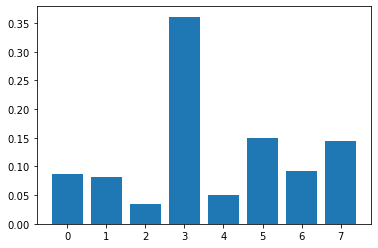

In [21]:
#visualize
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the matrix with topic proportions for each document (note that this excludes those in the dev set).
npz = np.load(os.path.join('female/output', 'theta.train.npz')) 
ids = npz['ids']
theta = npz['theta']
n_docs, n_topics = theta.shape

index =437

# plot the proportion of each topic in the first document
fig, ax = plt.subplots()
ax.bar(range(n_topics), theta[index, :])

# find the original line corresponding to this document, and display the text
print(ids[index])
for line in lines:
    doc = json.loads(line)
    if doc['id'] == ids[index]:
        print(doc['text'])
        break


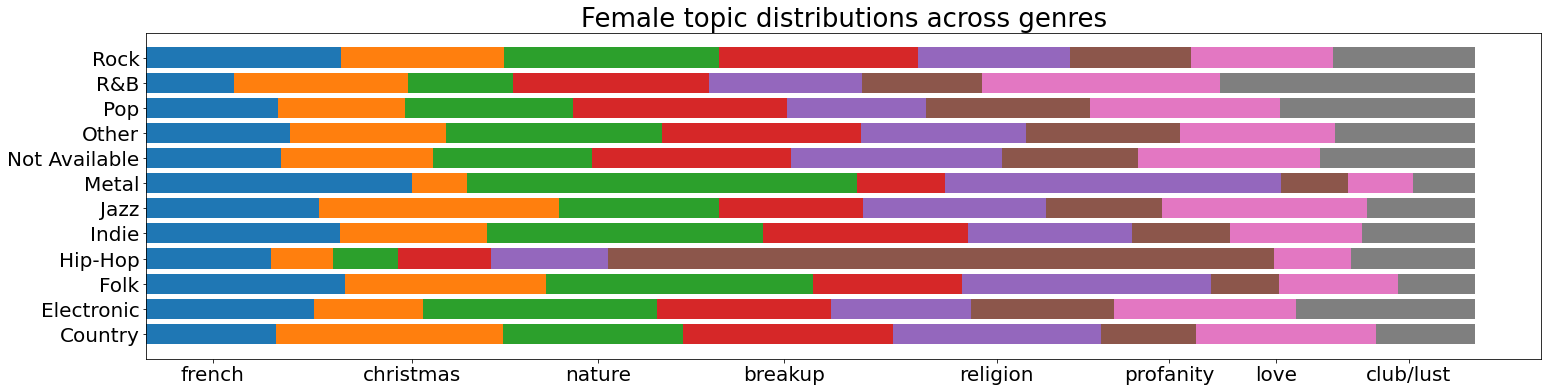

In [38]:

# load the senator variable for all the documents
groups_df = pd.read_csv(os.path.join('female', 'train.genre.csv'), header=0, index_col=0)
groups = groups_df.columns

# pull out a subset corresponding to the ids from above
train_subset = groups_df.loc[ids]
n_docs, n_groups = train_subset.shape

# plot the average senator-topic proportions
fig, ax = plt.subplots( figsize=(25,6))
lefts = np.zeros(12)
for k in range(n_topics):
    vals = []
    for group in groups:
        vals.append(np.mean(theta[train_subset[group] == 1, k]))

    ax.barh(range(n_groups), vals, left=lefts)
    lefts += np.array(vals)

ax.set_yticks(range(n_groups))
ax.set_yticklabels(groups, fontsize = 20)
#ax.set_ylabel('Genre', size = 20)
#ax.set_xlabel('Topic distribution', size = 16)
ax.set_xticks([0.05, 0.2, 0.34, 0.48, 0.64,0.77, 0.85,0.95])
#ax.set_yticklabels(['1970-77', '1977-82','1982-87','1987-92', '1992-97','1997-01','2001-14', '2014-16'], fontsize = 20)
ax.set_xticklabels(['french', 'christmas','nature','breakup', 'religion','profanity','love', 'club/lust'], fontsize = 20)
                 
plt.title('Female topic distributions across genres', size = 26)
#[t.set_color(i) for (i,t) in
# zip(['blue','orange','green','red','purple','brown','pink','grey','olive','cyan'],ax.xaxis.get_ticklabels())]
#ax.tick_params(axis='x', colors=zip['blue','orange','green','red','purple','brown','pink','grey','olive','cyan'])
#[t.set_color(zip['blue','orange','green','red','purple','brown','pink','grey','olive','cyan']) for t in ax.xaxis.get_ticklabels()]
plt.show();

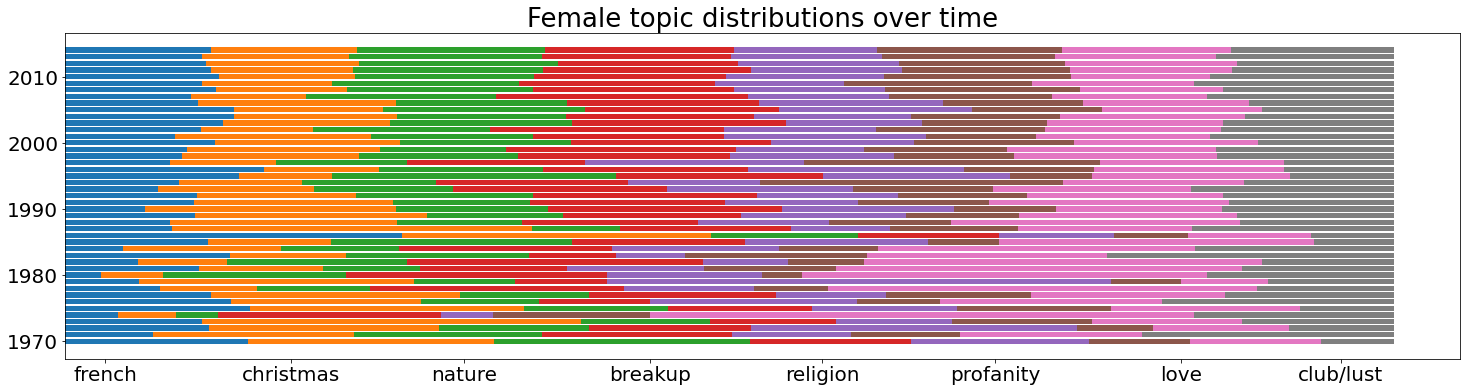

In [65]:
#### load the senator variable for all the documents
groups_df = pd.read_csv(os.path.join('female', 'train.year.csv'), header=0, index_col=0)
groups = groups_df.columns

# pull out a subset corresponding to the ids from above
train_subset = groups_df.loc[ids]
n_docs, n_groups = train_subset.shape

# plot the average senator-topic proportions
fig, ax = plt.subplots( figsize=(25,6))
lefts = np.zeros(n_groups)
for k in range(n_topics):
    vals = []
    for group in groups:
        vals.append(np.mean(theta[train_subset[group] == 1, k]))

    ax.barh(range(n_groups), vals, left=lefts)
    lefts += np.array(vals)

#ax.set_yticks(range(n_groups))
#ax.set_yticklabels(groups, fontsize = 20)
#ax.set_ylabel('Genre', size = 20)
#ax.set_xlabel('Topic distribution', size = 16)
ax.set_xticks([0.03, 0.17, 0.3, 0.44, 0.57,0.7, 0.84,0.96])
ax.set_yticks([0,10,20,30,40])
ax.set_yticklabels(['1970', '1980','1990','2000', '2010'], fontsize = 20)
ax.set_xticklabels(['french', 'christmas','nature','breakup', 'religion','profanity','love', 'club/lust'], fontsize = 20)
                 
plt.title('Female topic distributions over time', size = 26)
#[t.set_color(i) for (i,t) in
# zip(['blue','orange','green','red','purple','brown','pink','grey','olive','cyan'],ax.xaxis.get_ticklabels())]
#ax.tick_params(axis='x', colors=zip['blue','orange','green','red','purple','brown','pink','grey','olive','cyan'])
#[t.set_color(zip['blue','orange','green','red','purple','brown','pink','grey','olive','cyan']) for t in ax.xaxis.get_ticklabels()]
plt.show();